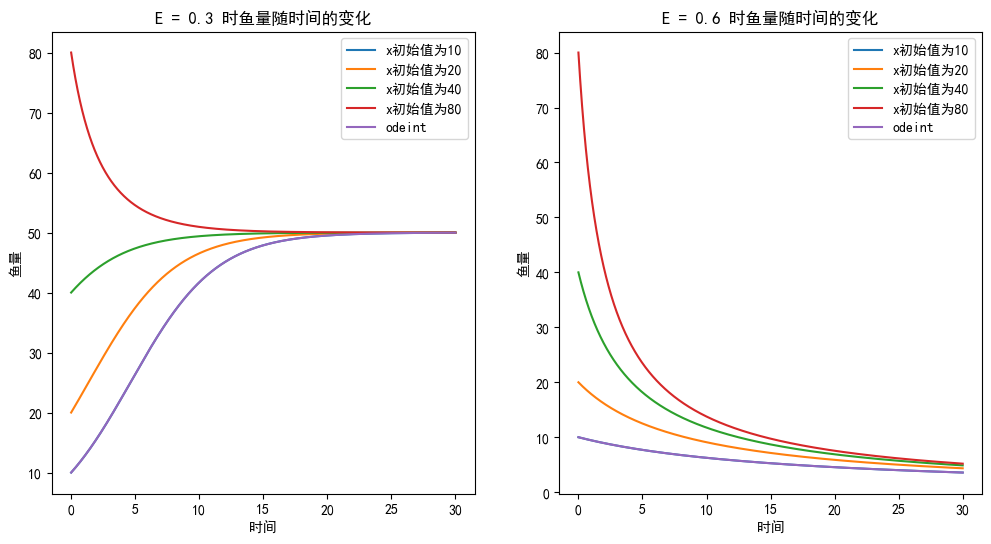

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False


def ode_equation(x, t, r, N, E):
    return r*x*(1 - x/N) - E*x


def forward(x0, t, r, N, E):
    x = []
    x.append(x0)
    for i in range(len(t)-1):
        dx = x[i] + ode_equation(x[i], t[i], r, N, E) * (t[i+1] - t[i])
        x.append(dx)
    return x, t

# 定义绘图函数
def plot_solutions(ax, E, r, N, x0_values, t):
    for x0 in x0_values:
        y, _ = forward(x0, t, r, N, E)
        ax.plot(t, y, label=f'x初始值为{x0}')
    solution = odeint(ode_equation, x0_values[0], t, args=(r, N, E))
    ax.plot(t, solution, label='odeint')
    ax.set_xlabel('时间')
    ax.set_ylabel('鱼量')
    ax.set_title(f'E = {E} 时鱼量随时间的变化')
    ax.legend()



# 参数设置
r = 0.6  
N = 100  
x0_values = [10, 20, 40, 80]
t = np.linspace(0, 30, 2000)


# 创建一个包含两个子图的图形
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


plot_solutions(axes[0], 0.3, r, N, x0_values, t)
plot_solutions(axes[1], 0.6, r, N, x0_values, t)

plt.show()

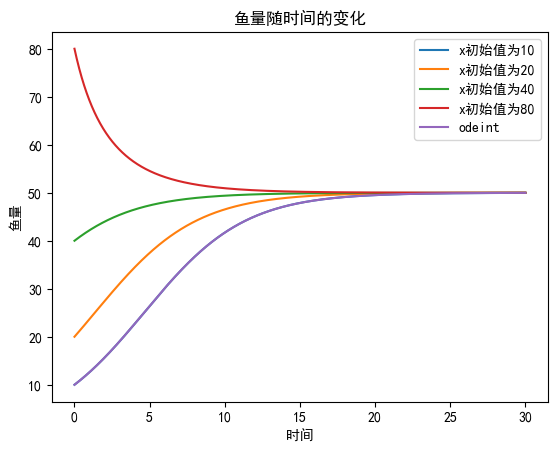

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


def ode_equation(x, t, r, N, E):
    return r*x*(1 - x/N) - E*x


def forward(x0, t, r, N, E):
    x = []
    x.append(x0)
    for i in range(len(t)-1):
        dx = x[i] + ode_equation(x[i], t[i], r, N, E) * (t[i+1] - t[i])
        x.append(dx)

    return x,t



# 参数设置
r = 0.6  
N = 100  
E = 0.3  
x0_0 = 10 
x0_1 = 20
x0_2 = 40
x0_3 = 80



t = np.linspace(0, 30, 2000)

y0,t = forward(x0_0, t, r, N, E)
y1,t = forward(x0_1, t, r, N, E)
y2,t = forward(x0_2, t, r, N, E)
y3,t = forward(x0_3, t, r, N, E)
solution = odeint(ode_equation, x0_0, t, args=(r, N, E))


plt.plot(t, y0, label='x初始值为10')
plt.plot(t, y1, label='x初始值为20')
plt.plot(t, y2, label='x初始值为40')
plt.plot(t, y3, label='x初始值为80')

plt.plot(t, solution, label='odeint') 
plt.xlabel('时间')
plt.ylabel('鱼量')
plt.title('鱼量随时间的变化')
plt.legend()  
plt.show()